In [20]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

In [21]:
search = lk.search_lightcurve("Kepler-6", mission="Kepler")
lc = search[0].download()

lc_clean = (
    lc
    .remove_nans()
    .remove_outliers(sigma=5)
    .flatten(window_length=401)
)

In [22]:
bls = lc_clean.to_periodogram(
    method="bls",
    period=np.linspace(1, 10, 2000),  # days
    frequency_factor=500
)


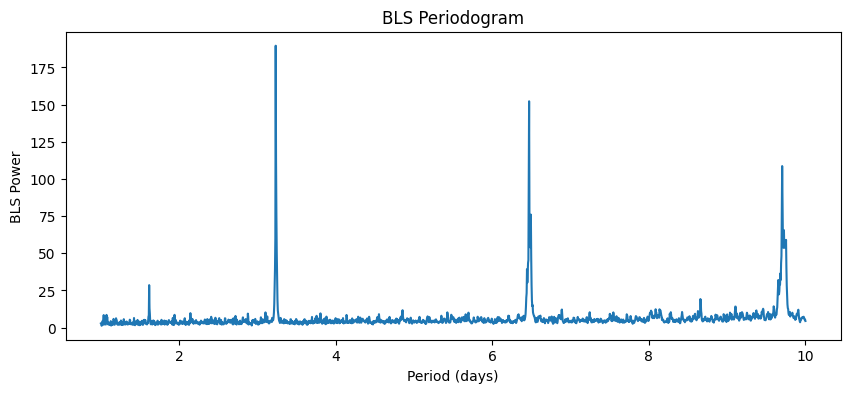

In [23]:
plt.figure(figsize=(10, 4))
plt.plot(bls.period, bls.power)
plt.xlabel("Period (days)")
plt.ylabel("BLS Power")
plt.title("BLS Periodogram")
plt.show()


In [24]:
best_period = bls.period_at_max_power
t0 = bls.transit_time_at_max_power
duration = bls.duration_at_max_power

best_period, t0, duration


(<Quantity 3.23311656 d>,
 <Time object: scale='tdb' format='bkjd' value=170.01513713262045>,
 <Quantity 0.15 d>)

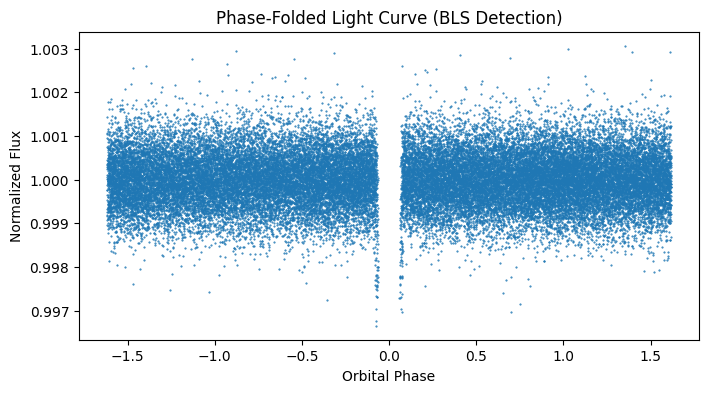

In [26]:
lc_folded = lc_clean.fold(
    period=best_period.value,
    epoch_time=t0.value
)

phase = lc_folded.phase.value
flux = lc_folded.flux.value

plt.figure(figsize=(8, 4))
plt.plot(phase, flux, ".", markersize=1)
plt.xlabel("Orbital Phase")
plt.ylabel("Normalized Flux")
plt.title("Phase-Folded Light Curve (BLS Detection)")
plt.show()

